In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [18]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


In [17]:
url = 'https://raw.githubusercontent.com/jimschenchen/public-storage/main/data/Hospitalizations.csv'

dataset = pd.read_csv(url).iloc[:, 1:]
dataset_train = dataset.sample(frac = 0.9)
dataset_test = dataset.drop(dataset_train.index)
print(len(dataset), len(dataset_train), len(dataset_test))

1019 917 102


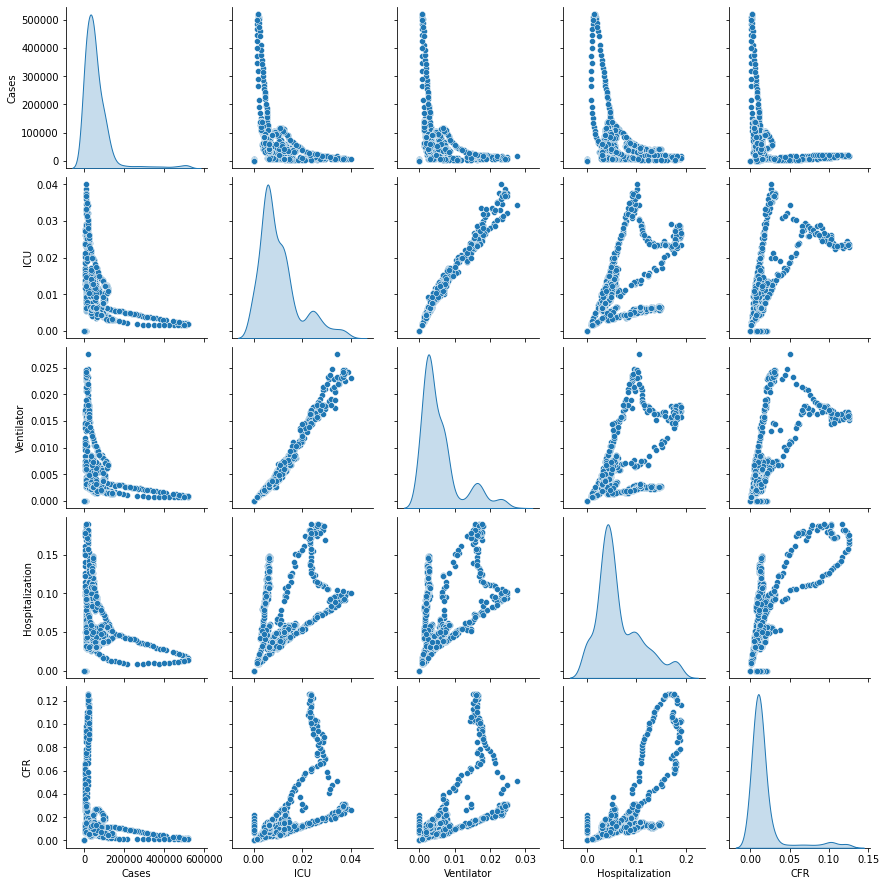

In [20]:
sns.pairplot(dataset_train[["Cases", "ICU", "Ventilator", "Hospitalization", "CFR"]], diag_kind="kde")

In [31]:
X_train = dataset_train.iloc[:, 0:1].values
Y_train = dataset_train.iloc[:, 1:2].values
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train.shape, Y_train.shape)

(917, 1) (917, 1)


In [70]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.optimizers import Adam

In [78]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=1))


# optimizer = tf.keras.optimizers.RMSprop(0.008)
# model.compile(optimizer=optimizer,loss='mean_squared_error')
model.compile(optimizer=Adam(lr=0.0008), loss="mean_squared_error", metrics=['mse'])

model.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
29/29 [==============================] - 0s 1ms/step - loss: 4461222.0000 - mse: 4461222.0000
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 134655.6562 - mse: 134655.6562
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 39971.1758 - mse: 39971.1758
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 5727.5698 - mse: 5727.5698
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 789.7584 - mse: 789.7584
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 110.3994 - mse: 110.3994
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 22.4484 - mse: 22.4484
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.9819 - mse: 0.9819
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0801 - mse: 0.0801
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0123 - mse: 0.0123
Epoch 11/100


In [80]:
X_test = dataset_test.iloc[:, 0:1].values
Y_test = dataset_test.iloc[:, 1:2].values
X_test, Y_test = np.array(X_test), np.array(Y_test)
print(X_test.shape, Y_test.shape)

(102, 1) (102, 1)


In [81]:
predicted_Y = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'A plot that shows the true and predicted values')

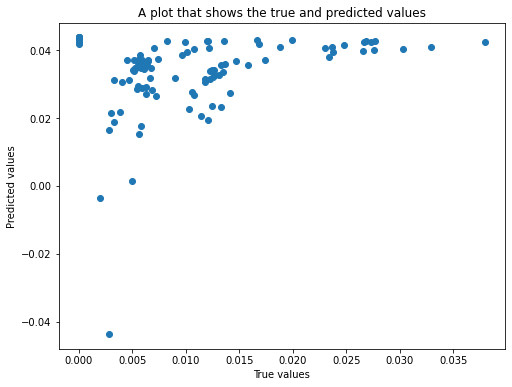

In [82]:
predicted_Y = predicted_Y.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predicted_Y)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
# plt.xlim([0, 60])
# plt.ylim([0, 60])
# plt.plot([-0.2, 0.2], [-0.2, 0.2])

In [89]:
model.evaluate(X_test, Y_test, batch_size=128)

1/1 [==============================] - 0s 13ms/step - loss: 6.8110e-04 - mse: 6.8110e-04


[0.0006810952909290791, 0.0006810952909290791]

In [92]:
predicted_Y = model.predict(X_test[80:90])
predicted_Y

1/1 [==============================] - 0s 11ms/step


array([[0.01659277],
       [0.0189121 ],
       [0.02171972],
       [0.03453711],
       [0.03612402],
       [0.03670385],
       [0.03700903],
       [0.03707007],
       [0.03716162],
       [0.0310581 ]], dtype=float32)

In [93]:
Y_test[80:90]

array([[0.00285024],
       [0.00328803],
       [0.00381185],
       [0.00607621],
       [0.00563199],
       [0.00551575],
       [0.00547862],
       [0.00510376],
       [0.00449189],
       [0.00329668]])

In [87]:
predicted_Y = model.predict(X_train[:10])
predicted_Y

1/1 [==============================] - 0s 12ms/step


array([[0.02818945],
       [0.04369421],
       [0.03725317],
       [0.04007605],
       [0.04122809],
       [0.04369193],
       [0.03447607],
       [0.04226568],
       [0.03429297],
       [0.03697851]], dtype=float32)

In [88]:
Y_train[:10]

array([[0.01069832],
       [0.        ],
       [0.01542511],
       [0.00608811],
       [0.02535497],
       [0.        ],
       [0.01030315],
       [0.        ],
       [0.01359456],
       [0.02084347]])